# Error Bar Illustration

In [61]:
from datetime import datetime
from matplotlib import dates as mdates
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skewnorm

sns.set()

In [62]:
time_range = (pd.Timestamp("2010-05-13 0:00:00"), pd.Timestamp("2010-06-01 00:00:00"))

In [66]:
# Read from Disk
df_dataset = pd.read_csv("../data/processed/skew_gaussian/k150/delta_window8/processed_daysahead3_R000.csv")
df_dataset.forward_time = pd.to_datetime(df_dataset.forward_time)

# Subset
df_dataset = df_dataset[df_dataset.forward_time.between(*time_range)]

# Print
df_dataset.head()

,current_time,forward_time,forward_Vp_pred,forward_Vp_obs,forward_mean,forward_sigma,forward_skew,forward_crps
498,2010-05-10 06:00:00,2010-05-13 00:00:00,475.233333,448.28,0.0,86.866421,-0.127687,23.610172
499,2010-05-10 12:00:00,2010-05-13 06:00:00,454.033333,414.89,0.0,94.604936,-0.074417,28.479257
500,2010-05-10 18:00:00,2010-05-13 12:00:00,438.600000,380.22,0.0,93.335782,-0.249446,35.922782
501,2010-05-11 00:00:00,2010-05-13 18:00:00,422.000000,380.81,0.0,95.366724,-0.160196,29.275775
502,2010-05-11 06:00:00,2010-05-14 00:00:00,406.100000,358.60,0.0,88.775141,-0.096127,30.650412


In [67]:
err1 = []
err2 = []

for _, row in df_dataset.iterrows():
    dist = skewnorm(
        row.forward_skew,
        loc=row.forward_Vp_pred + row.forward_mean,
        scale=row.forward_sigma,
    )
    err1.append(dist.interval(0.75))
    err2.append(dist.interval(0.95))

err1 = np.array(err1)
err2 = np.array(err2)
err1.shape

(77, 2)

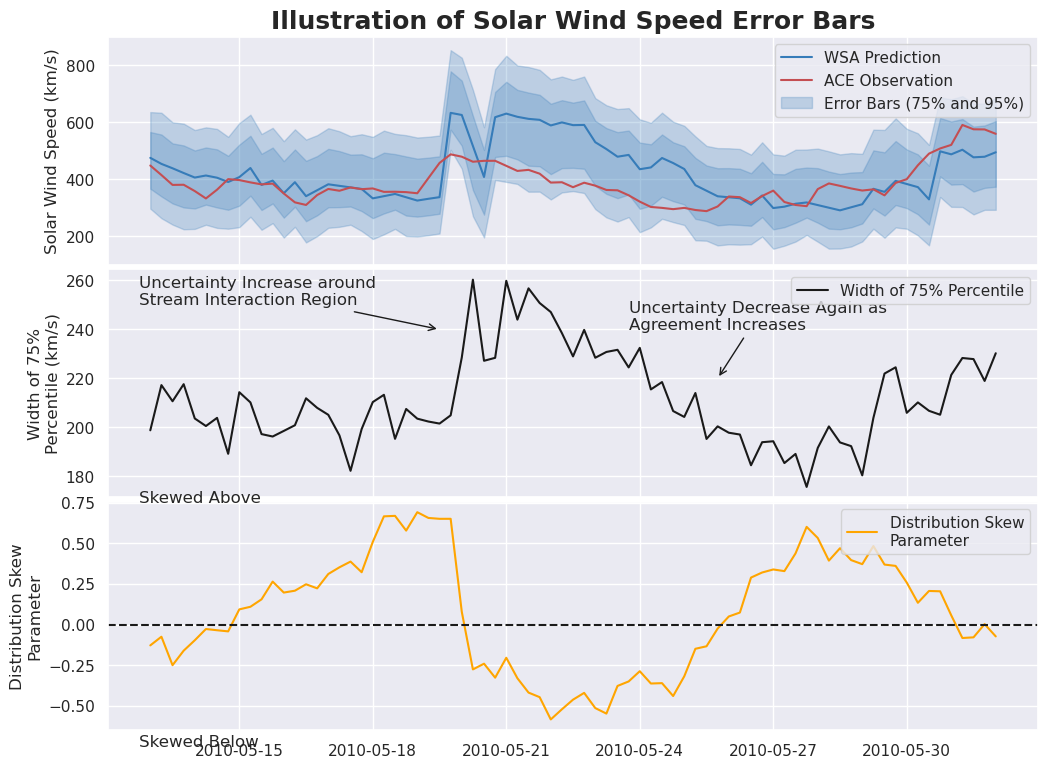

In [68]:
blue_color = "#367cb9"
red_color = "r"
black_color = "k"
gold_color = 'orange'
purple_color = 'purple'
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(12, 9))

# Error Bars ------------------------------
ax = axes[0]
ax.plot(
    df_dataset["forward_time"],
    df_dataset["forward_Vp_pred"],
    color=blue_color,
    label="WSA Prediction",
)
ax.plot(
    df_dataset["forward_time"],
    df_dataset["forward_Vp_obs"],
    color=red_color,
    label="ACE Observation",
)
ax.fill_between(
    df_dataset["forward_time"],
    err1[:, 0],
    err1[:, 1],
    alpha=0.25,
    color=blue_color,
    label="Error Bars (75% and 95%)",
)
ax.fill_between(
    df_dataset["forward_time"], err2[:, 0], err2[:, 1], alpha=0.25, color=blue_color
)
ax.set_ylabel("Solar Wind Speed (km/s)")
ax.set_yticks([200, 400, 600, 800])
ax.set_ylim(100, 900)

# Scale Parameter ------------------------------
ax = axes[1]
ax.plot(
    df_dataset["forward_time"],
    err1[:, 1] - err1[:, 0],
    color=black_color,
    label='Width of 75% Percentile',
)
ax.set_ylabel("Width of 75%\nPercentile (km/s)")

ax.annotate(
    "Uncertainty Decrease Again as\nAgreement Increases",
    xytext=(pd.Timestamp("2010-05-23 18:00:00"), 240),
    xy=(pd.Timestamp("2010-05-25 18:00:00"), 220),
    arrowprops=dict(arrowstyle="->", color="k"),
)

ax.annotate(
    "Uncertainty Increase around\nStream Interaction Region",
    xytext=(pd.Timestamp("2010-05-12 18:00:00"), 250),
    xy=(pd.Timestamp("2010-05-19 12:00:00"), 240),
    arrowprops=dict(arrowstyle="->", color="k"),
)

# Skew Parameter ------------------------------
ax = axes[2]
ax.plot(
    df_dataset["forward_time"],
    df_dataset["forward_skew"],
    color=gold_color,
    label="Distribution Skew\nParameter",
)
ax.set_ylabel("Distribution Skew\nParameter")
ax.axhline(0, linestyle='dashed', color='k')
ax.text(pd.Timestamp("2010-05-12 18:00:00"), 0.75, 'Skewed Above')
ax.text(pd.Timestamp("2010-05-12 18:00:00"), -0.75, 'Skewed Below')

for ax in axes:
    ax.legend(loc='upper right')

# i = 500
# print(repr((df_dataset.index[i], df_dataset.index[i + 100])))
#    ax.set_xlim(df_dataset.index[i], df_dataset.index[i + 100])

# plt.xlim(pd.Timestamp('2010-02-25 18:00:00'), pd.Timestamp('2010-03-22 18:00:00'))
axes[0].xaxis.set_major_locator(mdates.DayLocator(interval=3))
axes[0].set_title(
    "Illustration of Solar Wind Speed Error Bars", fontweight="bold", fontsize=18
)
plt.subplots_adjust(wspace=0.4, hspace=0.02)
plt.savefig("../plots/error_bar_illustration.png", dpi=300)